In [22]:
# 데이터 전처리도 하고 데이터 증강을 할껍니다. 증강기법을 많이 사용함.
# 기존 데이터를 가지고 증강시키는 작업을 많이 함.
# 실생활에서 이미지를 가지고 와서 폴더에 넣고 1번 폴더 , 1번 폴더 데이터로드 이용하여 폴더 클래스로 인식하고 폴더 데이터를 수치로 바꾸고 학습 시킴.
# 1장의 이미지에 하나의 객체가 있을때 그 객체를 인식하게끔, 사람 자동차 형태는 shape만 진행하는.
# cpu 고화질로 힘들어서 안되고, gpu를 사용해야함 / gpu 설치하자.

In [23]:
import matplotlib.pyplot as plt
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

In [24]:
train_dataset = CIFAR10(
    root='./',
    train=True,
    download=True,
    transform=ToTensor()
)
test_dataset = CIFAR10(
    root='./',
    train=False,
    download=True,
    transform=ToTensor()
)

In [25]:
train_dataset[0][0].view(32,32,3).size()
# .view() 자릿수 바꾸는게 아니라 데이터를 재배치 해준것임
# Invalid shape (3,32,32) for image data -> shape(32,32,3) 바뀜

torch.Size([32, 32, 3])

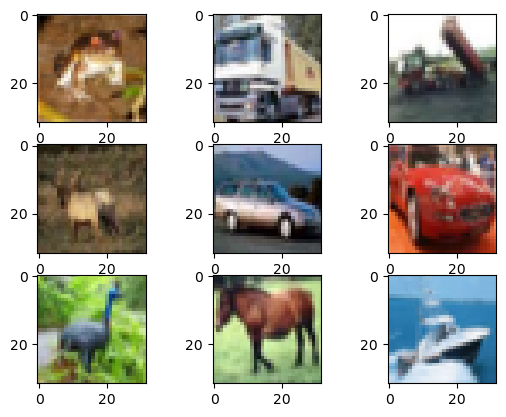

In [26]:
for i in range(9):
    img, label = train_dataset[i] # img : i번째 이미지 (텐서 형태) / label : 그 이미지에 해당하는 정답(클래스 번호)
    plt.subplot(3,3,i+1)
    plt.imshow(img.permute(1,2,0))
    
    # plt.imshow(train_dataset[i][0].view(32,32,3) #Invalid shape (3,32,32) for image data)

In [27]:
# 🧩 Compose의 기본 개념
# 여러 개의 이미지 전처리 과정을 “순서대로 차례차례 적용” 해주는 함수
# 즉, “이미지를 불러올 때 → 이거 하고 → 저거 하고 → 마지막에 또 이거 해”
# 이런 명령어 리스트를 하나로 묶는 역할을 해줘.

# T.Tensor()란?  이미지 -> 숫자  /  형태 : Tensor(C , H , W)
# T.ToPILImage()란? 숫자(Tensor) -> 이미지  /  형태 : PIL.Image

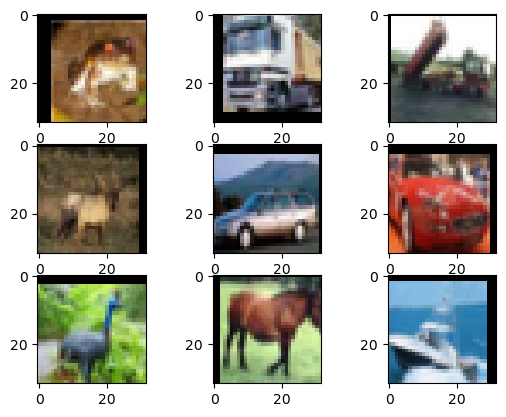

In [28]:
# Cropping과 뒤집기를 추가
import torchvision.transforms as T
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip , RandomCrop

transform = Compose([
    T.ToTensor(), # 이미지 -> 숫자
    RandomCrop( (32,32),padding=4 ), #이미지의 가장자리에 4픽셀만큼 여백을 추가하고, 그 안에서 (32×32) 크기로 임의의 위치를 잘라라.
    RandomHorizontalFlip(p=0.5) # 이미지를 50% 확률로 좌우 반전시켜라.
])

train_dataset = CIFAR10( # CIFAR10은 딥러닝 연습용 이미지 데이터셋 중 하나야. 총 6만 장의 컬러 이미지(32×32) 로 구성되어 있고, 10가지 분류(label)가 있어.
    root='./', # 데이터를 저장할 폴더 경로야. 즉, CIFAR10 데이터를 현재 폴더 안에 자동으로 다운로드해서 저장하겠다는 뜻이야.
    train=True, # 훈련용 데이터(train set)”을 불러오겠다는 옵션이야. train=True → 50,000장의 학습용 데이터
    download=True, # 데이터셋이 없으면 인터넷에서 자동으로 내려받아 저장해줘! 라는 뜻
    transform=transform # 위의 전처리 방법을 한 세트로 묶어둔 transform 불러와서 적용하겠다는 뜻. 
)
test_dataset = CIFAR10(
    root='./',
    train=False, #t rain=False → 10,000장의 테스트용 데이터
    download=True,
    transform=ToTensor() # 이미지를 Tensor 형태(숫자 배열)로만 변환 → 픽셀값을 0~1 사이 실수로 바꿔서 모델이 계산 가능하게 해야하기때문.
    # 불러온 이미지를 Tensor(텐서) 로 바꿔주는 전처리야. PIL(Python Image Library) 형태로 되어 있어서 파이토치 모델이 읽을 수 없어.
)

for i in range(9):
    img , label = train_dataset[i]
    plt.subplot(3,3,i+1) # 화면을 3행 3열로 나눔 (총 9칸) / 몇 번째 칸에 그릴지 지정 -> 이미지를 붙일 9칸짜리 표를 만들고 각 칸에 하나씩 그림을 그려라!
    plt.imshow(img.permute(1,2,0))
    # 여기서 중요한 건 .permute(1,2,0) 👇
    # 파이토치에서 이미지는 (채널, 높이, 너비) 순서(C,H,W)인데 0 1 2
    # matplotlib은     (높이, 너비, 채널) 순서(H,W,C)로 읽어. 1 2 0
    # 그래서 채널 위치를 바꿔줘야 색이 제대로 보여.


In [29]:
# 🎨 그럼 구체적으로 어떤 일이 일어날까?
# 하나의 이미지가 있을 때 이 전처리 세트는 이렇게 작동해 👇
# 1️⃣ ToTensor()
# : 이미지를 파이토치가 읽을 수 있는 숫자(텐서) 형태로 바꿔줘.
# 예: [255,128,0] → [1.0,0.5,0.0]
# 2️⃣ RandomCrop((32,32), padding=4)
# : 이미지를 살짝 자르거나 위치를 바꿔줘.
# 같은 사진이지만 살짝 다른 구도로 바뀜! 📸
# 3️⃣ RandomHorizontalFlip(p=0.5)
# : 50% 확률로 이미지를 좌우 반전시켜.
# 오른쪽을 보던 고양이가 왼쪽을 보게 됨 🐱
# 4️⃣ Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
# : 이미지의 밝기나 색을 일정하게 맞춰줘.
# 너무 밝거나 어두운 이미지가 섞여도 학습이 안정돼 🌈

In [ ]:
from torchvision.transforms import RandomHorizontalFlip , RandomCrop , Normalize
from torchvision.transforms import Compose

transform = Compose([
    T.ToTensor(),
    RandomCrop((32,32),padding=4),
    RandomHorizontalFlip(p=0.5),
    Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
    T.ToPILImage()
])

train_dataset = CIFAR10(
    root='./',
    train=True,
    download=True,
    transform=transform
)
test_dataset = CIFAR10(
    root='./',
    train=False,
    download=True,
    transform=ToTensor()
)

for i in range(9):
    img , label = train_dataset[i]
    plt.subplot(3,3,i+1)
    plt.imshow(transform(train_dataset.data[i])) # plt.imshow(...) -> 이미지표시
    # train_dataset.data 안에는 원본 이미지들이 numpy 배열 형태로 저장돼 있어. 즉, train_dataset.data[i]는 i번째 이미지의 원본 데이터 (아직 전처리 안 된 상태) 야.
    # i번째 원본 이미지를 transform 시켜서 전처리된 형태로 만들어라
plt.show()

In [ ]:
# 🔹 비유로 쉽게 설명해볼게
# 부모 클래스(nn.Module)는 이미 좋은 기본 설계도를 갖고 있어.
# 자식 클래스(BasicBlock)은 그 위에 자기만의 설계를 추가하려는 거야.
# 근데 부모 설계의 기본 세팅(전기 연결, 뼈대 구조 등)을 무시하면 건물이 무너질 수 있겠지? 😅
# 그래서 super().__init__()을 써서 “부모의 기본 세팅도 먼저 실행하고 나서, 내 세팅을 추가하자!” 라는 거야.
# __init__ 은 초기 설정함수로 "이 클래스가 만들어질 때,안에서 쓸 도구들을 미리 준비해둬라" 라는 뜻.

In [ ]:
# ⚙️ PyTorch에서 왜 꼭 써야 하냐?
# nn.Module(부모 클래스)은 딥러닝 모델의 기본 뼈대를 담당해.
# 레이어 등록
# 파라미터 추적
# GPU로 올리는 기능 (.to(device))
# 모델 저장/불러오기 (.state_dict())
# 이런 핵심 기능들이 다 부모 클래스의 초기화에서 설정돼.
# 그래서 super().__init__()을 안 쓰면
# 👉 이 기능들이 작동 안 하고, 모델이 이상하게 돌아가 😨

In [ ]:
import torch.nn as nn
import torch
class BasicBlock(nn.model): # nn.Module 부모 클래스 (기본 기능 보유) / BasicBlock 자식 클래스 (내가 추가로 만든 기능)
    def __init__(self , int_channel , out_channel , hidden_dim): 
        # 클래스가 하나의 요리사(객체) 라면, self는 그 요리사 자신의 냄비나 도구를 가리키는 말이야. 내 클래스 전체에서 계속 쓸 수 있는 변수
        super(BasicBlock , self).__init__() # -> “PyTorch의 기본 모델 기능(nn.Module)을 함께 초기화해줘!”
        # super()는 “부모 클래스의 함수를 실행시켜줘” 라는 명령이야.
        self.conv1 = nn.Conv2d(int_channel , hidden_dim , kernel_size=3 , padding=1) # “이 요리사(BasicBlock)가 쓸 자기만의 conv1 도구를 만든다”
        self.conv2 = nn.Conv2d(hidden_dim , out_channel , kernel_size=3 , padding=1)
        self.relu = nn.ReLU() # 활성함수로 곡선, 경계, 비선형적 패턴까지 ‘생각’ 하는 단계
        self.pool = nn.MaxPool2d(kernel_size=2) 
        # 이미지 크기를 절반으로 줄이면서 중요한 정보만 남겨라. 풀링층은 특징맵(feature map) 을 줄이는 단계야. 즉, “요약 정리” 역할을 하는 거지.
        # 2×2 영역에서 가장 큰 값(=가장 강한 특징)을 뽑아 남기고 나머진 버려버려.
    def forward(self,x): # forward() : 모델 안에서 데이터가 어떻게 흘러가며, 어떤 연산(Conv, ReLU, Pool) 을 거쳐서 결과가 나오는지를 정리하는 함수
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        out = self.pool(x)
        # “입력 x가 들어오면 → 첫 번째 합성곱 통과 → ReLU → 두 번째 합성곱 → ReLU → 풀링 → 출력으로 나감.”
        return out

In [ ]:
class CNN(nn.model):
    def __init__(self,num_class):
        super(CNN,self).__init__()
        self.block1 = BasicBlock(3,32,16) # 입력(3개 채널)을 입력으로 받아 중간에 16개 필터, 마지막에 32개 필터를 사용 / BasicBlock 안에 들어가는 숫자들은 내가 직접 정의할 수 있는 값이야.
                    # 이전 층에서 들어오는 특징맵(feature map)의 개수(입력채널값) , 블록 내부 첫 번째 Conv의 출력 크기(중간채널값) , 블록의 마지막 Conv에서 나가는 특징맵의 개수(출력채널값)
        self.block2 = BasicBlock(32,128,64) # 출력(32개 채널)을 입력으로 받아 중간에 64개 필터, 마지막에 128개 필터를 사용
            # 중간(hidden)64와 출력(out)128 숫자는 내가 바꿀 수 있음. 값이 클수록 더 많은 특징을 추출하고 더 많은 특징을 전달하기 때문에 모델이 더 크고 강력해지지만 연산량과 메모리 사용량도 함께 늘어남.
        self.block3 = BasicBlock(128,256,128) # in , out , hidden 순서
        
        # Linear() - 특징을 뽑은 뒤, 그 특징을 이용해서 정답(클래스)을 예측하는 단계
        self.fc1 = nn.Linear( 256*48*4 , 2048 ) # 처음 입력 크기가 32×32였고, 각 블록마다 절반씩 줄이니까 채널 256, 크기 4×4 됨
        self.fc2 = nn.Linear( 2048 , 256)
        self.fc3 = nn.Linear(256 , num_class)
        self.relu = nn.ReLU()
        